<a href="https://colab.research.google.com/github/Perkieee/IGTV_METRICS_SUCCESS/blob/main/Netflix_Tv_shows_and_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#We import various libraries that would help us withe the visualization and analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#We read the file containing the data and request to see the a preview of top 5 rows of the data
df = pd.read_csv(r"C:\Users\Sir\python lessons\netflix_titles.csv", encoding = 'latin1')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#This is to show us the columns present in the data
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
#This gives us a preview of the data in each column
df.info()
#As we can see there are columns with null objects that we need to clean up

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [ ]:
#We drop all the unnamed columns in the dataset as they do not contain data
df.drop(columns = ['Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19',
               'Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'], inplace = True,axis = 1)

In [ ]:
#We aain have a look at our data to check if the changes made have been put in place
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [ ]:
#Instead of doing away with the remaining rows with null values , we fill them up with 'unknown'
#This helps us not to discard a lot of information that can still be helpful in the rows containing null values.
columns_to_fill = ['director','cast','country','date_added','rating','duration']
for column in columns_to_fill:
    df[column].fillna('unknown',inplace = True)

df.info()
#As you can now see,there is no column now containing null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      8809 non-null   object
 4   cast          8809 non-null   object
 5   country       8809 non-null   object
 6   date_added    8809 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8809 non-null   object
 9   duration      8809 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [ ]:
#We then check for duplicated columns then go straight to our analysis
duplicates = df.duplicated().sum()
print(duplicates)

0


In [ ]:
#We rank the top 20 countries producing both the movies and Tv Shows from our data.
#As you can see I have requested for the top 21, this is because of the rows that we had filled with 'unknown'
#Due to the high number of unknown production countries we can see It at number 3,hence we asked for top 21 so us to still get the top 20 countries.
countries_produced = df['country'].value_counts().head(21)
countries_produced

United States                    2819
India                             972
unknown                           831
United Kingdom                    419
Japan                             245
South Korea                       200
Canada                            181
Spain                             145
France                            124
Mexico                            110
Egypt                             106
Turkey                            105
Nigeria                            95
Australia                          87
Taiwan                             81
Indonesia                          79
Brazil                             77
Philippines                        75
United Kingdom, United States      75
United States, Canada              73
Germany                            67
Name: country, dtype: int64

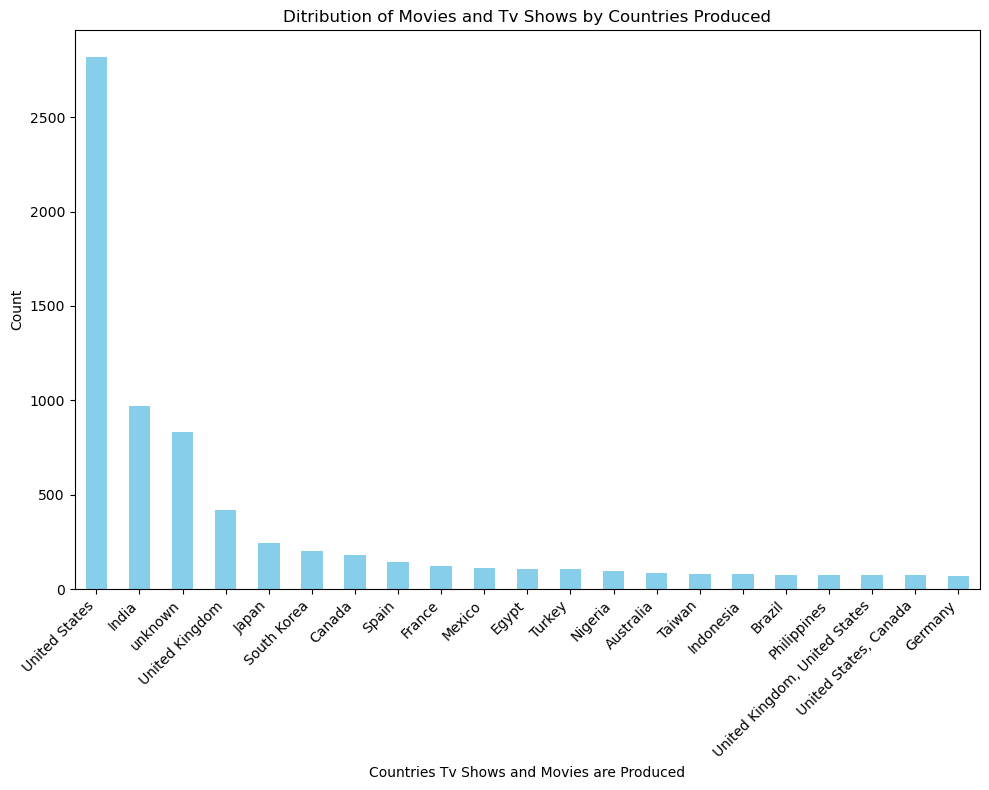

In [ ]:
#We can now visualize our data using a  bar chart
plt.figure(figsize =(10,8))
countries_produced.plot(kind = 'bar', color = 'skyblue')
plt.title('Ditribution of Movies and Tv Shows by Countries Produced')
plt.xlabel('Countries Tv Shows and Movies are Produced')
plt.ylabel('Count')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()
'''The United States is top on the charts in production of both Movies and Tv Shows and closing the top 20
is Germany producing a total of 67 Movies and Tv Shows'''

In [ ]:
#For our next analysis we can look at the top countries in producing Tv Shows only.
#We create a new dataframe that only has Tv Shows Data.
Tv_shows_df = df[df['type'] == 'TV Show']
Tv_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [ ]:
#Ranking the Top 20 Countries producing Tv Shows
#At number 1 is still the United States with a huge margin to the second country
#which is the United Kingdom
Country_Tvshows = Tv_shows_df['country'].value_counts().head(21)
Country_Tvshows

United States            760
unknown                  391
United Kingdom           213
Japan                    169
South Korea              159
India                     79
Taiwan                    68
Canada                    59
France                    49
Australia                 48
Spain                     48
Mexico                    40
China                     38
Turkey                    29
Brazil                    27
Thailand                  24
Colombia                  22
United States, Canada     22
Germany                   20
Argentina                 18
Singapore                 17
Name: country, dtype: int64

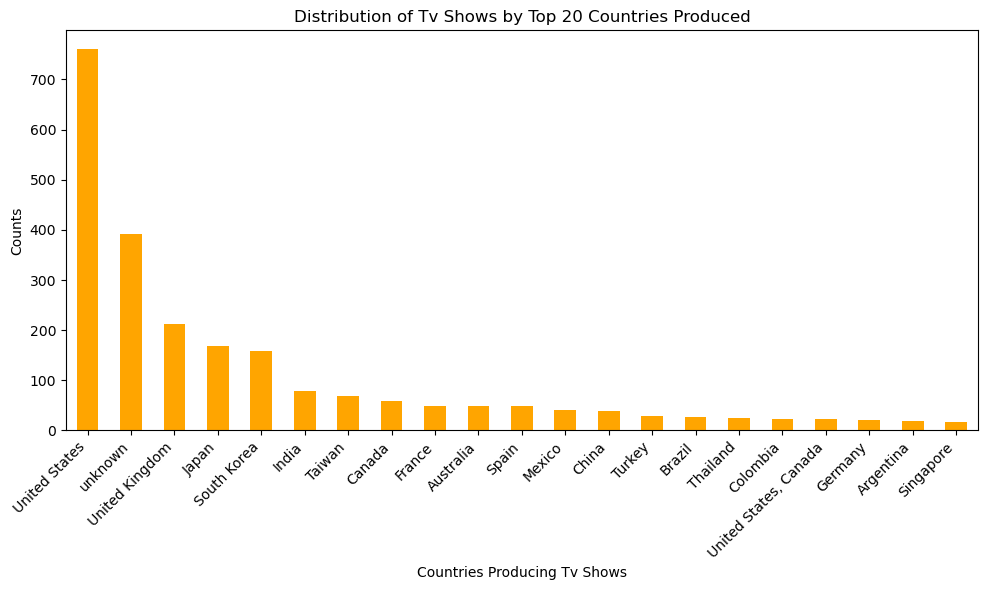

In [ ]:
#We visualize our data and as we can see Germany has rised in the chart from 20th to 17th now in Tv Shows Production,
#While India has fallen from 2nd to 5th now in Tv Shows production
plt.figure(figsize = (10,6))
Country_Tvshows.plot(kind = 'bar', color = 'orange')
plt.title('Distribution of Tv Shows by Top 20 Countries Produced')
plt.xlabel('Countries Producing Tv Shows')
plt.ylabel('Counts')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

In [ ]:
#Onto the next analysis we now create a new dataset containing Movies only data
Movies_df = df[df['type'] == 'Movie']
Movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis NiewÃ¶hner, Milan Peschel,...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [ ]:
#Ranking the Countries producing the movies, again the United States is at number 1
#with a huge margin while India comes  up at number 2 pushing the United Kingdom to number 3
Movie_country = Movies_df['country'].value_counts().head(21)
Movie_country
#From Our dataset we can see most Countries thrive from producing Movies rather than Tv Shows.

United States                    2059
India                             893
unknown                           440
United Kingdom                    206
Canada                            122
Spain                              97
Egypt                              92
Nigeria                            86
Indonesia                          77
Turkey                             76
Japan                              76
France                             75
Philippines                        73
Mexico                             70
United Kingdom, United States      63
United States, Canada              51
Brazil                             50
Hong Kong                          50
Germany                            47
South Korea                        41
Australia                          39
Name: country, dtype: int64

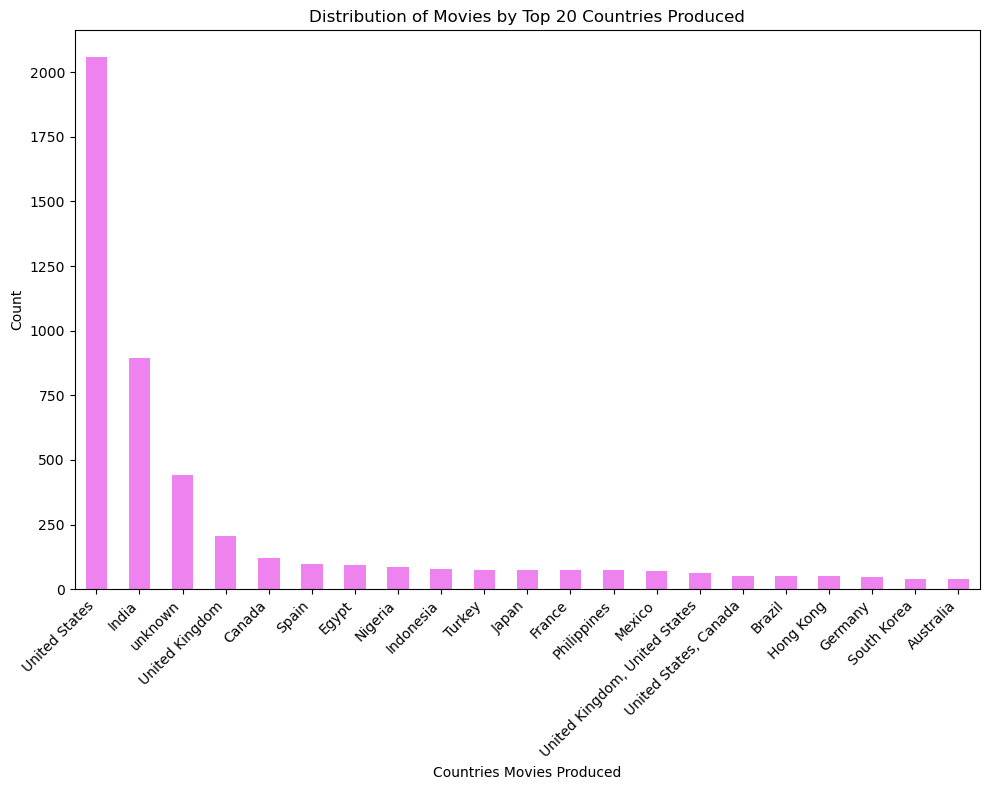

In [ ]:
#Bar chart visualization of our data above
plt.figure(figsize = (10,8))
Movie_country.plot(kind = 'bar', color = 'violet')
plt.title('Distribution of Movies by Top 20 Countries Produced')
plt.xlabel('Countries Movies Produced')
plt.ylabel('Count')
plt.xticks(rotation = 45 , ha = 'right')
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#We now analyse the distribution of Tv Shows and Movies based on the listed in type.
Movie_Tvshows_type = df['listed_in'].value_counts().head(10)

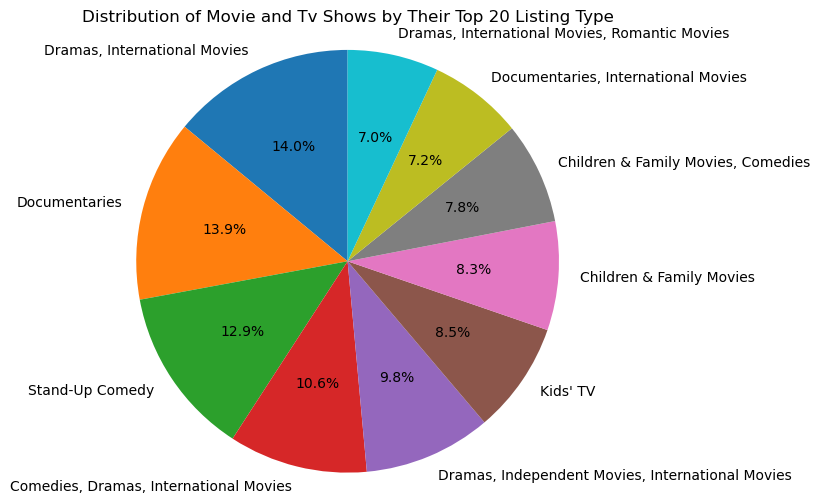

In [ ]:
#Taking the Top 10 listed in types we visualize them using a pie chart.
#At number one are Movies and Tv Shows listed as 'Drama, International Movies'
#Closing our Top 10 are Movies and Tv Shows listed as 'Dramas,International Movies,Romantic Movies'.
#This information is kind of biased because our dataset has more of Movies produced than Tv Shows
#So we cannot rank the distribution of both Movies and Tv Shows quite well.
#Let us rank the distributions in different pie charts to have clear visualization and gain valuable insight
plt.figure(figsize = (6,6))
Movie_Tvshows_type.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 90)
plt.title('Distribution of Movie and Tv Shows by Their Top 10 Listing Type')
plt.ylabel(' ')
plt.axis('equal')
plt.show()

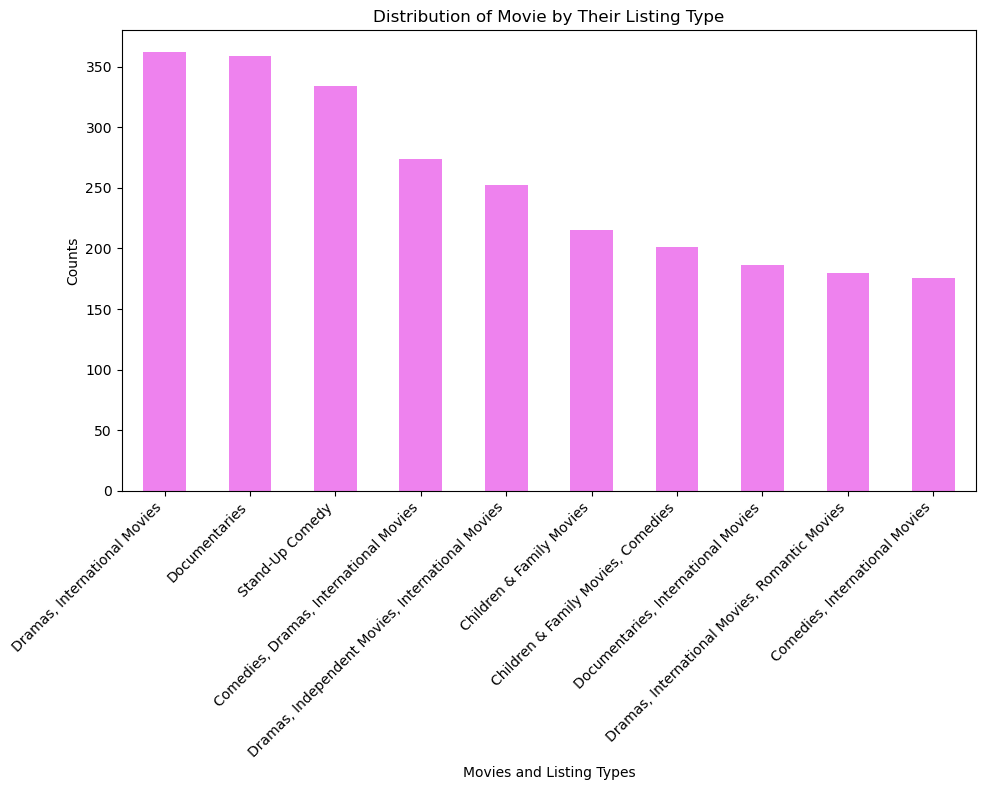

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Comedies, International Movies                      176
Name: listed_in, dtype: int64

In [ ]:
#Here we rank the top 10 Movies distribution according to their listed in type.
#We visualize it with a bar chart then a Pie chart later on below.
Movies_type = Movies_df['listed_in'].value_counts().head(10)
plt.figure(figsize=(10,8))
Movies_type.plot(kind = 'bar', color = 'violet')
plt.title('Distribution of Movie by Their Listing Type')
plt.ylabel('Counts')
plt.xlabel('Movies and Listing Types')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()
Movies_type
#'Dramas, International Movies' top the list while 'Comedies, International Movies'
#close the top 10 with a total of 176 movies produced

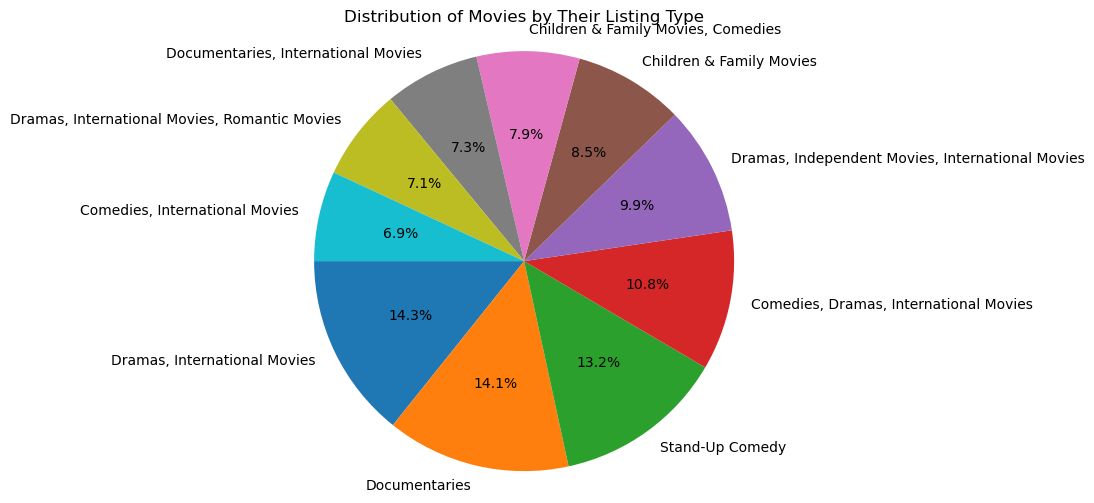

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Comedies, International Movies                      176
Name: listed_in, dtype: int64

In [ ]:
#Pie-Chart visualization of our data above.
#Close up at number two is the 'Documentaries' Movie type
plt.figure(figsize = (10,6))
Movies_type.plot(kind = 'pie',autopct = '%1.1f%%', startangle = 180)
plt.title('Distribution of Movies by Their Listing Type')
plt.ylabel(' ')
plt.axis('equal')
plt.show()
Movies_type

In [ ]:
#On the listed in movie type we decide to conduct further analysis to figure out the top countries that produce
#the top produced listed in type movies 'Dramas, International Movies'.
#India comes up at number one with a staggering 118 Dramas, International Movies listed in type
#while Mexico closes the top 10 list with 6.
#Nigeria once again is on the list as the only African Country in the top 10 aat number two in 'Drama, International Movies'
#Movies production with 19
Dramas_International_Movies_df = Movies_df[Movies_df['listed_in'] == 'Dramas, International Movies']
Dramas_International_Movies_country_df = Dramas_International_Movies_df['country'].value_counts().head(11)
Dramas_International_Movies_country_df

India             118
unknown            25
Nigeria            19
Indonesia          15
Egypt              12
Spain              10
Japan               7
France              7
United Kingdom      7
Turkey              7
Mexico              6
Name: country, dtype: int64

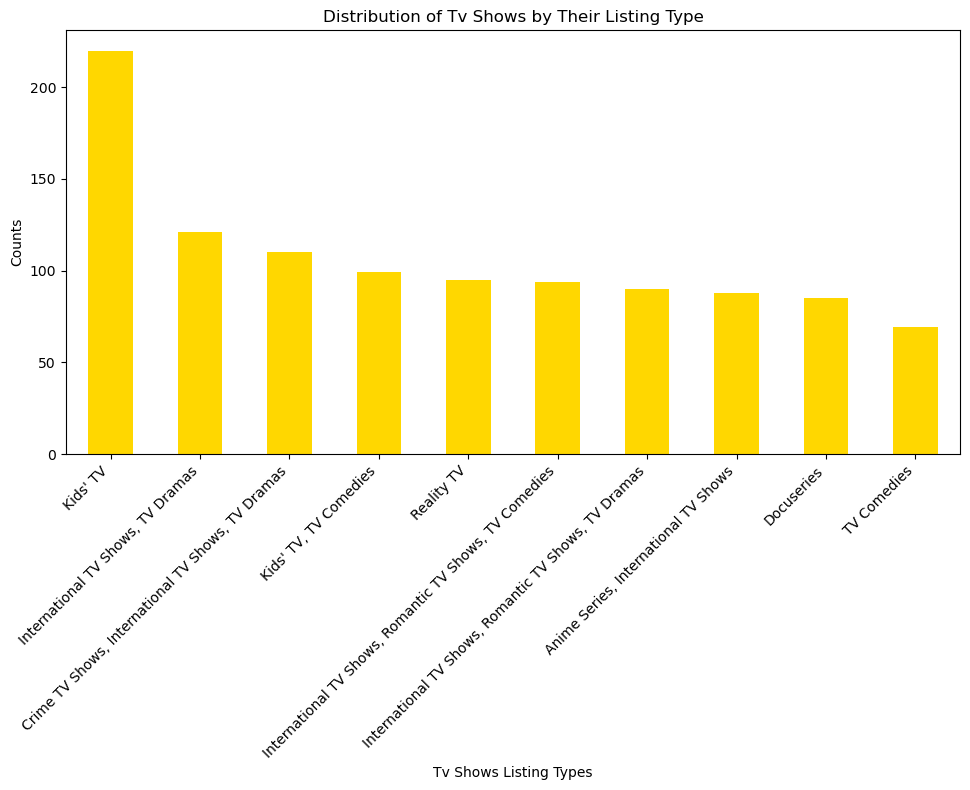

Top 10 Tv Shows Listed Types
 Kids' TV                                                  220
International TV Shows, TV Dramas                         121
Crime TV Shows, International TV Shows, TV Dramas         110
Kids' TV, TV Comedies                                      99
Reality TV                                                 95
International TV Shows, Romantic TV Shows, TV Comedies     94
International TV Shows, Romantic TV Shows, TV Dramas       90
Anime Series, International TV Shows                       88
Docuseries                                                 85
TV Comedies                                                69
Name: listed_in, dtype: int64


In [ ]:
#We now visualize the Tv Shows listed in distribution
#At number one is the 'Kids Tv' Tv Shows and we can also see 'Docuseries' at number 8 emphasize
#how Documentaries have been produced highly from our dataset.
Tvshows_type = Tv_shows_df['listed_in'].value_counts().head(10)
plt.figure(figsize=(10,8))
Tvshows_type.plot(kind = 'bar', color = 'gold')
plt.title('Distribution of Tv Shows by Their Listing Type')
plt.ylabel('Counts')
plt.xlabel('Tv Shows Listing Types')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()
print('Top 10 Tv Shows Listed Types\n',Tvshows_type)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#Looking at the Top 10 countries producing our number on Tv show listed in type 'Kids' Tv'.
#United States comes up at number 1.
Kids_Tv_countries_df = Tv_shows_df[Tv_shows_df['listed_in'].str.contains("Kids' TV", case = False)]
Country_counts_Kids_tv = Kids_Tv_countries_df['country'].value_counts().head(11)
Country_counts_Kids_tv

United States            146
unknown                   81
United Kingdom            22
Canada                    20
France                    16
United States, Canada     14
Japan                     13
Australia                 11
India                     10
South Korea                9
Russia                     5
Name: country, dtype: int64

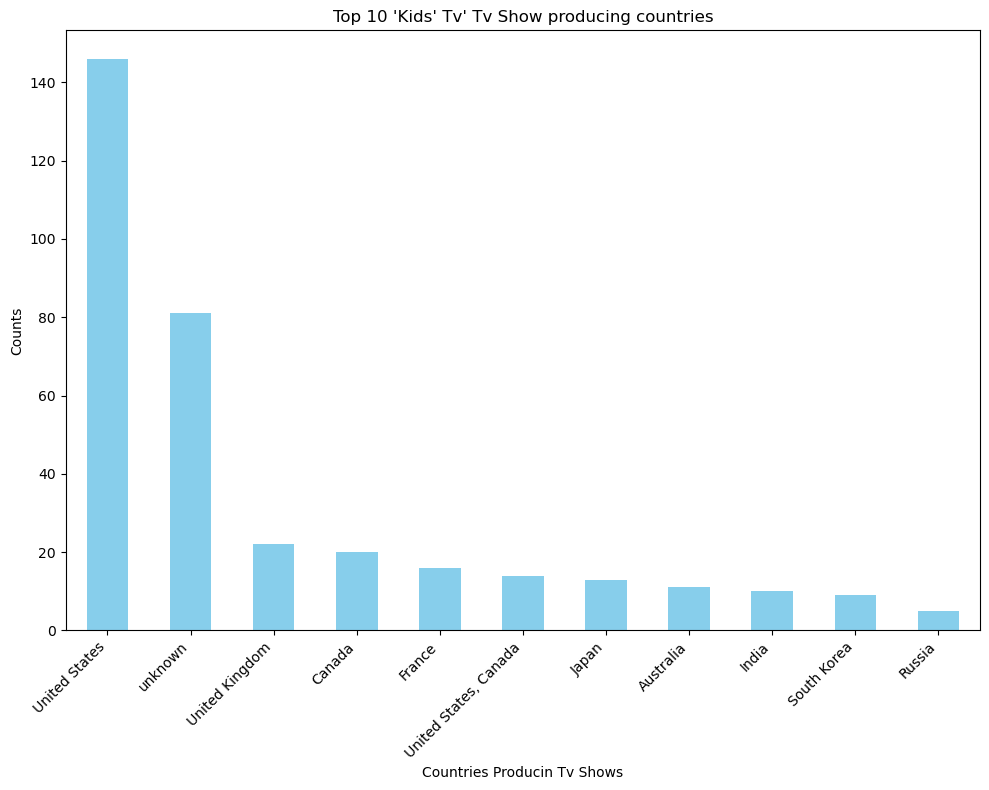

In [ ]:
#Visualization of the above.
plt.figure(figsize = (10,8))
Country_counts_Kids_tv.plot(kind = 'bar' , color = 'skyblue')
plt.title("Top 10 'Kids' Tv' Tv Show producing countries")
plt.xlabel('Countries Producin Tv Shows')
plt.ylabel("Counts")
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()